Pràctica: Project 2B  
Autores: Bo Miquel Nordfeldt, Joan Muntaner, Helena Antich  
Fecha: Abril 2021 

# Descripción de la práctica  

El objetivo de esta práctica es diseñar una Red Neuronal Convolucional, o 'Convolution Neural Network' (CNN) en inglés, capaz de clasificar imágenes, con buena precisión, en dos tipos: imágenes que contengan perros e imágenes que contengan gatos.

Para ello se ha partido de la arquitectura proporcionada por el profesor, la cual tenía un 'accuracy' relativamente bajo y tenía 'overfitting' (es decir que el modelo sobre-entrenaba y se aprendía los datos de 'memoria'), y mediante la implementación de más capas en la red y el uso de diferentes técnicas vistas en clase se ha conseguido aumentar el 'accuracy' del modelo y reducir su 'overfitting'.

Este jupyter notebook contiene:
* Una breve descripción teorica de que es una Red Neuronal Convolucional
* La arquitectura inicial de la red proporcionada por el profesor
* Una batería de pruebas donde se explican brevemente que mejoras se han implementado y que resultados se han obtenido
* La arquitectura final explicada detalladamente

# ¿Qué es una una Red Neuronal Convolucional?

Una Red Neuronal Convolucional es una red neuronal artificial especializada en trabajar con imágenes. Para ello esta red aplica la operación de convolución (utilizando unas neuronas atificiales específicas que realizan esta operación) con la cual se obtienen las características, o features, de la imagen. Después de implementar la convolución se aplica la operación de 'pooling' con la cual se consigue reducir el tamaño de la imagen, reduciendo así el coste computacional. Hay dos tipos de 'poolings': 'max-pooling' y 'average-pooling'. En el 'max-pooling' la imagen se divide en trozos pequeños y de cada trozo se utiliza, para montar la siguiente imagen, únicamente el píxel convolucionado con mayor valor. En el 'average-pooling' también se realiza la división de la imagen en trozos pequeños, pero en vez de utilizar el valor más alto del trozo se usa la media de todos sus valores. *Actualmente se tiene una mayor tendencia a utilizar el 'max-pooling' ya que hace que el sistema sea invariante a cambios geométricos*. Una vez acabada la fase de 'convolución-pooling', la red debe transformar la imagen, la cual es una matriz, en un vector mediante una capa de 'flatten'. Seguidamente se pueden utilizar los datos de estos vectores para alimentar una (o varias) capas de neuronas 'fully connected' (neuronas comunes) las cuales son las que se encargan de procesar o interpretar las características de la imagen. Finalmente, tenemos la capa de salida donde, dependiendo de lo que queramos hacer con la red, podemos tener una neurona de salida o varias. Por ejemplo, si queremos clasificar las imágenes en dos tipos podemos tener una única neurona de salida y que clasifique un tipo de imágenes con un 0 y el otro tipo de imágenes con un 1. Si se tienen más de dos tipos de imágenes se deben poner más neuronas de salida (uno por cada tipo).

SOFTMAX i SIGMOIDE EXPLICAR

Resumiendo, la estructura básica de una Red Neuronal Convolucional es la siguiente: CONV1-POOL1, CONV2-POOL2,... CONVn-POOLn, FLATTEN, FC1, FC2,... FCm, FCoutput


# Librerías 

In [2]:
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random

Using TensorFlow backend.


# Código inicial  
Descripción del código inicial dado por el curso


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/25
250/250 [==============================] - 25s 98ms/step - loss: 0.6761 - accuracy: 0.5745 - val_loss: 0.7410 - val_accuracy: 0.5670
Epoch 2/25
250/250 [==============================] - 23s 91ms/step - loss: 0.6089 - accuracy: 0.6786 - val_loss: 0.6746 - val_accuracy: 0.6092
Epoch 3/25
250/250 [==============================] - 23s 92ms/step - loss: 0.5669 - accuracy: 0.7034 - val_loss: 0.4579 - val_accuracy: 0.7099
Epoch 4/25
250/250 [==============================] - 25s 99ms/step - loss: 0.5392 - accuracy: 0.7319 - val_loss: 0.5424 - val_accuracy: 0.7515
Epoch 5/25
250/250 [==============================] - 25s 99ms/step - loss: 0.5011 - accuracy: 0.7531 - val_loss: 0.4188 - val_accuracy: 0.7795
Epoch 6/25
250/250 [==============================] - 24s 97ms/step - loss: 0.4829 - accuracy: 0.7656 - val_loss: 0.5101 - val_accuracy: 0.7779
Epoch 7/25
250/250 [==============================] 

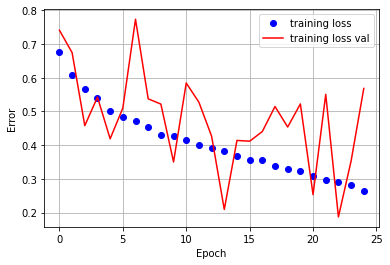

El modelo considera que en la imagen hay un  dog
La imagen contiene de verdad un perro


In [17]:
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\munta\OneDrive\Escritorio\Aprendizaje Profundo\G03_Project2B\G03_Project2B\deeplearning-az-master\datasets\Part 2 - Convolutional Neural Networks (CNN)\dataset\training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(r'C:\Users\munta\OneDrive\Escritorio\Aprendizaje Profundo\G03_Project2B\G03_Project2B\deeplearning-az-master\datasets\Part 2 - Convolutional Neural Networks (CNN)\dataset\test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history = classifier.fit_generator(training_set,
                                   steps_per_epoch = 250,
                                   epochs = 25,
                                   validation_data = test_set,
                                   validation_steps = 62)

history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss') 
plt.plot(val_loss_values,'r',label='training loss val')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()



# Part 3 - Making new predictions
test_image = image.load_img(r'C:\Users\munta\OneDrive\Escritorio\Aprendizaje Profundo\G03_Project2B\G03_Project2B\deeplearning-az-master\datasets\Part 2 - Convolutional Neural Networks (CNN)\dataset\single_prediction\cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    

print("El modelo considera que en la imagen hay un ", prediction)    
print("La imagen contiene de verdad un perro")    

Deficiencias del código

# Pruebas realizadas  
Se han realizado diversas pruebas, se pueden encontrar algunas en la carpeta adjunta de "pruebas". Dos de las más destacadas son: 

## Prueba ejemplo 1  
Descripción de la prueba

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/20
350/350 [==============================] - 41s 117ms/step - loss: 0.6560 - accuracy: 0.6156 - val_loss: 0.4244 - val_accuracy: 0.7177
Epoch 2/20
350/350 [==============================] - 40s 114ms/step - loss: 0.5786 - accuracy: 0.6980 - val_loss: 0.3914 - val_accuracy: 0.7631
Epoch 3/20
350/350 [==============================] - 40s 115ms/step - loss: 0.5387 - accuracy: 0.7291 - val_loss: 0.4646 - val_accuracy: 0.7561
Epoch 4/20
350/350 [==============================] - 39s 112ms/step - loss: 0.5156 - accuracy: 0.7475 - val_loss: 0.5463 - val_accuracy: 0.7774
Epoch 5/20
350/350 [==============================] - 39s 111ms/step - loss: 0.4919 - accuracy: 0.7640 - val_loss: 0.5457 - val_accuracy: 0.7393
Epoch 6/20
350/350 [==============================] - 41s 116ms/step - loss: 0.4792 - accuracy: 0.7713 - val_loss: 0.4513 - val_accuracy: 0.7718
Epoch 7/20
350/350 [==========================

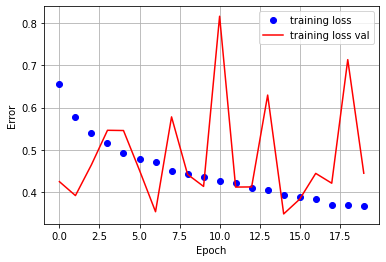

El modelo considera que en la imagen hay un  dog
La imagen contiene de verdad un perro


In [18]:
# Importar las librerías y paquetes

tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Parte 1 - Construir el modelo de CNN

# Inicializar la CNN
classifier = Sequential()

# Paso 1 - Convolución
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), 
                      input_shape = (64, 64, 3), activation = "relu"))

# Paso 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Una segunda capa de convolución y max pooling
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), activation = "relu"))

classifier.add(MaxPooling2D(pool_size = (2,2)))


#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
classifier.add(Dropout(0.25)) # NUEVO 

# Paso 3 - Flattening
classifier.add(Flatten())

# Paso 4 - Full Connection

classifier.add(Dense(units = 128, activation = "relu"))
#classifier.add(Dense(units = 64, activation = "relu")) #NUEVO
classifier.add(Dense(units = 32, activation = "relu")) #NUEVO

#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
classifier.add(Dropout(0.25)) # NUEVO 
classifier.add(Dense(units = 1, activation = "sigmoid"))

# Compilar la CNN
classifier.compile(optimizer = "RMSprop", loss = "binary_crossentropy", metrics = ["accuracy"]) #NUEVO
#classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# Parte 2 - Ajustar la CNN a las imágenes para entrenar 

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_dataset = train_datagen.flow_from_directory(r'C:\Users\munta\OneDrive\Escritorio\Aprendizaje Profundo\G03_Project2B\G03_Project2B\deeplearning-az-master\datasets\Part 2 - Convolutional Neural Networks (CNN)\dataset\training_set',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

testing_dataset = test_datagen.flow_from_directory(r'C:\Users\munta\OneDrive\Escritorio\Aprendizaje Profundo\G03_Project2B\G03_Project2B\deeplearning-az-master\datasets\Part 2 - Convolutional Neural Networks (CNN)\dataset\test_set',
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode='binary')

#NUEVO 
# A los 15 valores de coste sin variar significativamente deja de ajustar el modelo
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=100, verbose=1, mode='auto')

# Ajusta el modelo a más de 1000 iteraciones con el 'earlystopper' y lo asigna al historial
history = classifier.fit_generator(training_dataset,
                        steps_per_epoch=350,
                        epochs=20,
                        validation_data=testing_dataset,
                        validation_steps=200,
                        callbacks = [earlystopper])

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss') 
plt.plot(val_loss_values,'r',label='training loss val')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()


# Parte 3 - Cómo hacer nuevas predicciones
test_image = image.load_img(r'C:\Users\munta\OneDrive\Escritorio\Aprendizaje Profundo\G03_Project2B\G03_Project2B\deeplearning-az-master\datasets\Part 2 - Convolutional Neural Networks (CNN)\dataset\single_prediction\cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_dataset.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    
print("El modelo considera que en la imagen hay un ", prediction)    
print("La imagen contiene de verdad un perro")   

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/20
350/350 [==============================] - 41s 118ms/step - loss: 0.6556 - accuracy: 0.6089 - val_loss: 0.4233 - val_accuracy: 0.7168
Epoch 2/20
350/350 [==============================] - 40s 116ms/step - loss: 0.5835 - accuracy: 0.6981 - val_loss: 0.4600 - val_accuracy: 0.7465
Epoch 3/20
350/350 [==============================] - 37s 105ms/step - loss: 0.5471 - accuracy: 0.7229 - val_loss: 0.5017 - val_accuracy: 0.7618
Epoch 4/20
350/350 [==============================] - 38s 109ms/step - loss: 0.5198 - accuracy: 0.7466 - val_loss: 0.4771 - val_accuracy: 0.7646
Epoch 5/20
350/350 [==============================] - 39s 111ms/step - loss: 0.4894 - accuracy: 0.7645 - val_loss: 0.5133 - val_accuracy: 0.7511
Epoch 6/20
350/350 [==============================] - 37s 107ms/step - loss: 0.4795 - accuracy: 0.7767 - val_loss: 0.4559 - val_accuracy: 0.7726
Epoch 7/20
350/350 [==========================

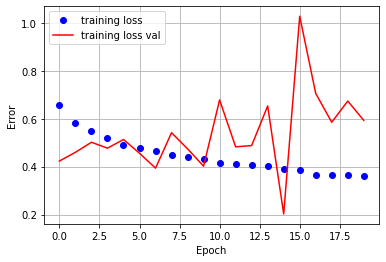

El modelo considera que en la imagen hay un  dog
La imagen contiene de verdad un perro


In [19]:
# Importar las librerías y paquetes

tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Parte 1 - Construir el modelo de CNN

# Inicializar la CNN
classifier = Sequential()

# Paso 1 - Convolución
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), 
                      input_shape = (64, 64, 3), activation = "relu"))

# Paso 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Una segunda capa de convolución y max pooling
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), activation = "relu"))

classifier.add(MaxPooling2D(pool_size = (2,2)))


#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
classifier.add(Dropout(0.25)) # NUEVO 

# Paso 3 - Flattening
classifier.add(Flatten())

# Paso 4 - Full Connection

classifier.add(Dense(units = 128, activation = "relu"))
classifier.add(Dense(units = 64, activation = "relu")) #NUEVO
classifier.add(Dense(units = 32, activation = "relu")) #NUEVO

#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
classifier.add(Dropout(0.25)) # NUEVO 
classifier.add(Dense(units = 1, activation = "sigmoid"))

# Compilar la CNN
classifier.compile(optimizer = "RMSprop", loss = "binary_crossentropy", metrics = ["accuracy"]) #NUEVO
#classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# Parte 2 - Ajustar la CNN a las imágenes para entrenar 

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_dataset = train_datagen.flow_from_directory(r'C:\Users\munta\OneDrive\Escritorio\Aprendizaje Profundo\G03_Project2B\G03_Project2B\deeplearning-az-master\datasets\Part 2 - Convolutional Neural Networks (CNN)\dataset\training_set',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

testing_dataset = test_datagen.flow_from_directory(r'C:\Users\munta\OneDrive\Escritorio\Aprendizaje Profundo\G03_Project2B\G03_Project2B\deeplearning-az-master\datasets\Part 2 - Convolutional Neural Networks (CNN)\dataset\test_set',
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode='binary')

#NUEVO 
# A los 15 valores de coste sin variar significativamente deja de ajustar el modelo
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=100, verbose=1, mode='auto')

# Ajusta el modelo a más de 1000 iteraciones con el 'earlystopper' y lo asigna al historial
history = classifier.fit_generator(training_dataset,
                        steps_per_epoch=350,
                        epochs=20,
                        validation_data=testing_dataset,
                        validation_steps=200,
                        callbacks = [earlystopper])

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss') 
plt.plot(val_loss_values,'r',label='training loss val')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()


# Parte 3 - Cómo hacer nuevas predicciones
test_image = image.load_img(r'C:\Users\munta\OneDrive\Escritorio\Aprendizaje Profundo\G03_Project2B\G03_Project2B\deeplearning-az-master\datasets\Part 2 - Convolutional Neural Networks (CNN)\dataset\single_prediction\cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_dataset.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    
print("El modelo considera que en la imagen hay un ", prediction)    
print("La imagen contiene de verdad un perro")  

## Prueba ejemplo 2  
Descripción de la prueba

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/60
350/350 [==============================] - 73s 209ms/step - loss: 0.6889 - accuracy: 0.5408 - val_loss: 0.6446 - val_accuracy: 0.6064
Epoch 2/60
350/350 [==============================] - 34s 98ms/step - loss: 0.6552 - accuracy: 0.6143 - val_loss: 0.6683 - val_accuracy: 0.6126
Epoch 3/60
350/350 [==============================] - 35s 99ms/step - loss: 0.6154 - accuracy: 0.6645 - val_loss: 0.6195 - val_accuracy: 0.6023
Epoch 4/60
350/350 [==============================] - 34s 98ms/step - loss: 0.5867 - accuracy: 0.6941 - val_loss: 0.6214 - val_accuracy: 0.7294
Epoch 5/60
350/350 [==============================] - 34s 98ms/step - loss: 0.5581 - accuracy: 0.7140 - val_loss: 0.5016 - val_accuracy: 0.7042
Epoch 6/60
350/350 [==============================] - 35s 99ms/step - loss: 0.5391 - accuracy: 0.7337 - val_loss: 0.4755 - val_accuracy: 0.7663
Epoch 7/60
350/350 [==============================]

350/350 [==============================] - 35s 99ms/step - loss: 0.3110 - accuracy: 0.8646 - val_loss: 0.3718 - val_accuracy: 0.8456
Epoch 57/60
350/350 [==============================] - 35s 99ms/step - loss: 0.3103 - accuracy: 0.8691 - val_loss: 0.5749 - val_accuracy: 0.8405
Epoch 58/60
350/350 [==============================] - 35s 100ms/step - loss: 0.3111 - accuracy: 0.8692 - val_loss: 0.2642 - val_accuracy: 0.8621
Epoch 59/60
350/350 [==============================] - 35s 99ms/step - loss: 0.3141 - accuracy: 0.8711 - val_loss: 0.3588 - val_accuracy: 0.8602
Epoch 60/60
350/350 [==============================] - 35s 99ms/step - loss: 0.3089 - accuracy: 0.8696 - val_loss: 0.2670 - val_accuracy: 0.8840


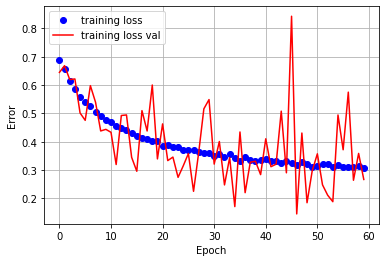

El modelo considera que en la imagen hay un  dog
La imagen contiene de verdad un perro


In [3]:
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)


# Parte 1 - Construir el modelo de CNN

# Inicializar la CNN
classifier = Sequential()

# Paso 1 - Convolución
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), 
                      input_shape = (64, 64, 3), activation = "relu"))

# Paso 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Una segunda capa de convolución y max pooling
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), activation = "relu"))

classifier.add(MaxPooling2D(pool_size = (2,2)))


#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
classifier.add(Dropout(0.25 )) # NUEVO 

# Paso 3 - Flattening
#classifier.add(Flatten())

#################################################################

classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), 
                      input_shape = (64, 64, 3), activation = "relu"))

# Paso 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Una segunda capa de convolución y max pooling
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), activation = "relu"))

classifier.add(MaxPooling2D(pool_size = (2,2)))


#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
classifier.add(Dropout(0.25 )) # NUEVO 

# Paso 3 - Flattening
classifier.add(Flatten())
################################################################################

# Paso 4 - Full Connection

classifier.add(Dense(units = 128, activation = "relu"))
#classifier.add(Dense(units = 64, activation = "relu")) #NUEVO
classifier.add(Dense(units = 32, activation = "relu")) #NUEVO
#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
classifier.add(Dropout(0.25)) # NUEVO 
classifier.add(Dense(units = 1, activation = "sigmoid"))

# Compilar la CNN
classifier.compile(optimizer = "RMSprop", loss = "binary_crossentropy", metrics = ["accuracy"]) #NUEVO
#classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
# Parte 2 - Ajustar la CNN a las imágenes para entrenar 

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_dataset = train_datagen.flow_from_directory(r'C:\Users\munta\OneDrive\Escritorio\Aprendizaje Profundo\G03_Project2B\G03_Project2B\deeplearning-az-master\datasets\Part 2 - Convolutional Neural Networks (CNN)\dataset\training_set',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

testing_dataset = test_datagen.flow_from_directory(r'C:\Users\munta\OneDrive\Escritorio\Aprendizaje Profundo\G03_Project2B\G03_Project2B\deeplearning-az-master\datasets\Part 2 - Convolutional Neural Networks (CNN)\dataset\test_set',
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode='binary')

#NUEVO #NUEVO #NUEVO #NUEVO #NUEVO #NUEVO #NUEVO #NUEVO #NUEVO #NUEVO
# A los 15 valores de coste sin variar significativamente deja de ajustar el modelo
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=100, verbose=1, mode='auto')

# Ajusta el modelo a más de 1000 iteraciones con el 'earlystopper' y lo asigna al historial
history = classifier.fit_generator(training_dataset,
                        steps_per_epoch=350,
                        epochs=60,
                        validation_data=testing_dataset,
                        validation_steps=200,
                        callbacks = [earlystopper])

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss') 
plt.plot(val_loss_values,'r',label='training loss val')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()


# Parte 3 - Cómo hacer nuevas predicciones
test_image = image.load_img(r'C:\Users\munta\OneDrive\Escritorio\Aprendizaje Profundo\G03_Project2B\G03_Project2B\deeplearning-az-master\datasets\Part 2 - Convolutional Neural Networks (CNN)\dataset\single_prediction\cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_dataset.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    
print("El modelo considera que en la imagen hay un ", prediction)    
print("La imagen contiene de verdad un perro")       

# CNN final

Después de las diversas pruebas realizadas se ha logrado obtener un mejor modelo para la identificación de imágenes de perros y gatos. Como se ha mencionado anteriormente, con las pruebas realizadas se ha logrado obtener un modelo con neuronas convolucionales que ya no presentase overfitting. De esta manera, el objetivo principal ha sido mejorar el modelo. 

En las siguientes celdas se describirá el mejor modelo que se ha obtenido teniendo  en cuenta la accuracy obtenida y la evolución del error del modelo en cada época. Además, como se podrá observar en la siguientes celdas, se describirá de manera más detallada los cambios realizados respecto al código inicial presentado en el curso Udemy. 

## Implementación de las capas convolucionales

In [ ]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Inicializar la CNN
classifier = Sequential()

# Paso 1 - Convolución
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), 
                      input_shape = (64, 64, 3), activation = "relu"))

# Paso 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Una segunda capa de convolución y max pooling
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), activation = "relu"))

classifier.add(MaxPooling2D(pool_size = (2,2)))


#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
classifier.add(Dropout(0.25 )) # NUEVO 

#################### Duplicación de las capas convolucionales ####################

classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), 
                      input_shape = (64, 64, 3), activation = "relu"))

# Paso 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Una segunda capa de convolución y max pooling
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), activation = "relu"))

classifier.add(MaxPooling2D(pool_size = (2,2)))

##################################################################################

#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
classifier.add(Dropout(0.25 )) # NUEVO 

# Paso 3 - Flattening
classifier.add(Flatten())


Esta parte del código es donde se encuentran la mayoría de los cambios, ya que en esta celda se lleva a cabo la implementación de las capas convolucionales del modelo. Como se ha descrito anteriormente, toda red con neuronas convolucionales presentan una estructura inicial muy parecida, la cual podemos identificar con los comentarios 'Paso 1', 'Paso 2' y 'Paso 3'. De esta manera, los cambios realizados son:

* Para reducir el overfitting se ha usado la función 'Dropout', que elimina el % de conexiones entre capas. En nuestro caso, se eliminan el 25% de conexiones entre varias capas convolucionales.
* Para mejorar el modelo, se ha decidido añadir más capas convolucionales, es decir, se han añadido nuevas capas de convolución y de polling (consejo realizado por el doctor ***Andrew Ng***). En nuestro caso, se ha decidido doblar el nuemero de capas del código inicial (4 capas convolucionales y 4 capas de polling).  

## Full connection

In [ ]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Paso 4 - Full Connection

classifier.add(Dense(units = 128, activation = "relu"))
#classifier.add(Dense(units = 64, activation = "relu")) #NUEVO
classifier.add(Dense(units = 32, activation = "relu")) #NUEVO

#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
classifier.add(Dropout(0.25)) # NUEVO 

classifier.add(Dense(units = 1, activation = "sigmoid"))

Una vez establecidas las capas convolucionales del modelo, se lleva a cabo el 'Paso 4' llamado Full Connection. En este momento, se implementan las capas encargadas de interpretar las características de las imágenes para así poder clasificarlas. Para ello se implementan capas de neuronas comunes que son alimentadas por los datos de las neuronas convolucionales.

En un inicio, el código inicial tan sólo presentaba dos capas. Una capa de 128 neuronas y una capa de salida de 1 neurona. Gracias a las pruebas realizadas (como la linia comentada de 64 neuronas), se ha comprobado que es necesario añadir más capas intermedias para que el modelo pueda mejorar la clasificación. Despues de varias pruebas, la mejor combinación de capas es la siguiente:

* Una primera capa de 128 neuronas con una función de activación tipo 'relu'
* Una segunda capa de 32 neuronas con una función de activación tipo 'relu'
* Una capa de salida de 1 neurona con una función de activación tipo 'sigmoid'. La función de activación sigmoid es ideal para casos binarios, es decir, perro o gato.

Además, es necesario mencionar que se ha usado una vez más la función 'Dropout' de un 25% entre las dos últimas capas para reducir aún más el overfitting que puede sufrir el modelo.


## Compilar CNN

In [ ]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Compilar la CNN
classifier.compile(optimizer = "RMSprop", loss = "binary_crossentropy", metrics = ["accuracy"]) #NUEVO
#classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

Una vez implementado la arquitectura de la red neuronal de nuestro modelo, llega el momento de compilar la red. Para ello se ha decido usar un optimizer distinto. En el código inicial, se recurre al optimizador 'adam' (el más habitual en las redes neuronales). Sin embargo, después de una búsqueda se ha decidido usar el optimizer 'RMSprop' obteniendo mejores resultados. Es necesario mencionar que durante la búsqueda de alternativas para la mejora del código se observó el uso del optimizer 'RMSprop' para la identificación de imágenes que representaban dígitos. Esta mejora se debe a que RMSprop es menos dependiente al error absoluto del entrenamiento pero es más dependiente de su evolución y tendencia, es decir, **EXPLICAR JEFA!!!!!!!!!!!!!!!!**

## Ajuste de la CNN para el entrenamiento

In [ ]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Parte 2 - Ajustar la CNN a las imágenes para entrenar 

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_dataset = train_datagen.flow_from_directory(r'C:\Users\munta\OneDrive\Escritorio\Aprendizaje Profundo\G03_Project2B\G03_Project2B\deeplearning-az-master\datasets\Part 2 - Convolutional Neural Networks (CNN)\dataset\training_set',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

testing_dataset = test_datagen.flow_from_directory(r'C:\Users\munta\OneDrive\Escritorio\Aprendizaje Profundo\G03_Project2B\G03_Project2B\deeplearning-az-master\datasets\Part 2 - Convolutional Neural Networks (CNN)\dataset\test_set',
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode='binary')

#NUEVO 
# A los 15 valores de coste sin variar significativamente deja de ajustar el modelo
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=100, verbose=1, mode='auto')

# Ajusta el modelo a más de 1000 iteraciones con el 'earlystopper' y lo asigna al historial
history = classifier.fit_generator(training_dataset,
                        steps_per_epoch=350, #NUEVO
                        epochs=150, #NUEVO
                        validation_data=testing_dataset,
                        validation_steps=200,
                        callbacks = [earlystopper])


En esta celda se lleva a cabo el ajuste de la red para su entrenamiento, es decir, se inicia el entrenamiento del modelo a través de un conjunto de imágenes de perros y gatos. Para el entrenamiento se han usado un total de 8000 imágenes de perros y gatos y un total de 2000 imágenes per el testeo del modelo. Así pues, el proceso de aprendizaje del modelo tiene en cuenta un total de 10000 imágenes, hecho que conlleva un mayor tiempo de computación. 

Con el código inicial el tiempo de computación era excesivamente alto, sin exagerar el modelo estaba entrenando un par de horas. Para reducir este tiempo se han realizado dos cambios muy significativos:
* Se han reducido los pasos por cada época. En un inicio eran 8000 pasos por época y ahora tan sólo 350, es decir, ahora mismo el modelo recorre cada imagen 350 veces cada época. Este hecho también influye en que el modelo no sufra overfitting. ***REVISAR EXPLICACION!!!!!!!!!!!!!!!***
* Se ha añadido un 'Earlystopper' al modelo. Básicamennte, es una función de Keras que obliga al modelo a dejar de entrenar si la métrica elegida no mejora significamente. En nuestro caso, se ha decido que el modelo deje de entrenar si la diferencia entre los errores es de 0.01. En otros modelos vistos durante la búsqueda, esta diferencia era aún menor. 

Gracias a la visualización de la evolución del error del entrenamiento y testeo durante las pruebas se ha decidido aumentar el número de épocas a 150. En comparación a las pruebas realizadas, es un aumento considerable. Sin embargo, gracias al earlystopper definido, si el modelo no necesita tantas épocas para su entrenamiento el modelo se detendrá. 


## Plot de la evolución de la pérdida

In [ ]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss') 
plt.plot(val_loss_values,'r',label='training loss val')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()


Toda esta celda es un añadido al codigo inicial. Se ha decidido que sería de gran ayuda poder observar la evolución del error durante el aprendizaje y así poder observar si el modelo llega a estabilizarse. De esta manera, el plot obtenido ha sido de gran ayuda para la decisión del aumento de épocas durante el entrenamiento, como se ha mencionado anteriormente. 

Como se puede obsercar en el plot obtenido, a medida que avanza el modelo, que aumentan las épocas, el modelo logra establecerse. 

## Comprobación de la funcionalidad de la CNN

Por último, en la siguiente celda no hay cambios a destacar. Tan sólo se han añadido dos 'prints' para observar si el modelo identifica de forma positiva una imagen. En esta caso, se ha decidido cargar la imagen de un perro. 

In [ ]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Parte 3 - Cómo hacer nuevas predicciones
test_image = image.load_img(r'C:\Users\munta\OneDrive\Escritorio\Aprendizaje Profundo\G03_Project2B\G03_Project2B\deeplearning-az-master\datasets\Part 2 - Convolutional Neural Networks (CNN)\dataset\single_prediction\cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_dataset.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

#NUEVO    
print("El modelo considera que en la imagen hay un ", prediction)    
print("La imagen contiene de verdad un perro")       

Como se puede observar, el modelo logra identificar de forma correcta la imagen. 